# Project on IPL Data Analysis


### Firstly,we will import pandas,numpy,matlpotlib and seaborn library to start the project.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the csv in dataframe

In [2]:
df = pd.read_csv(r'C:\Users\sameer narwade\Downloads\deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Indepth Analysis of David Warner Performance

In [3]:
filt = df['batsman'] == 'DA Warner'
df_Warner=df[filt]
df_Warner.shape

(2902, 21)

<AxesSubplot:ylabel='dismissal_kind'>

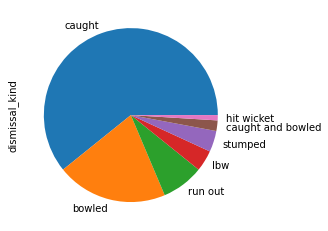

In [4]:
df_Warner['dismissal_kind'].value_counts().plot.pie()

## Function to calculate numbers of 1S,2S,3S,4S,6S by david warner

In [5]:
def count(df,runs):
    return len(df_Warner[df_Warner['batsman_runs']==runs])*runs

In [6]:
count(df_Warner,1)

997

In [7]:
count(df_Warner,2)

414

In [8]:
count(df_Warner,3)

39

In [9]:
count(df_Warner,4)

1604

In [10]:
count(df_Warner,6)

960

([<matplotlib.patches.Wedge at 0x1ff813648e0>,
 [Text(0.7817643705069365, 0.7738504177203069, '1'),
  Text(-0.33959111687520577, 1.0462685474291247, '2'),
  Text(-0.6816960876596443, 0.863302058418451, '3'),
  Text(-1.1128316125234867, -0.44900534759440974, '4'),
  Text(0.8038429148449225, -0.750890516822272, '6')],
 [Text(0.4264169293674199, 0.4221002278474401, '24.8%'),
  Text(-0.18523151829556675, 0.5706919349613407, '10.3%'),
  Text(-0.3718342296325332, 0.4708920318646096, '1.0%'),
  Text(-0.6491517739720338, -0.261919786096739, '40.0%'),
  Text(0.4384597717335941, -0.4095766455394211, '23.9%')])

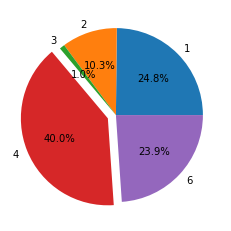

In [11]:
slices =[997,414,39,1604,960]
labels =[1,2,3,4,6]
explode=[0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode)

## Changing team names to abbreviations

In [12]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [13]:
teams ={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'}

In [14]:
df['batting_team']=df['batting_team'].map(teams)
df['bowling_team']=df['bowling_team'].map(teams)

In [15]:
runs=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
runs.drop('match_id',axis=1,inplace=True)
runs

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183
...,...,...,...
1279,2,KKR,140
1280,1,GL,162
1281,2,SRH,163
1282,1,SRH,208


## Calculating runs of team in 1st inning and 2nd inning

In [16]:
inning1=runs[runs['inning']==1]
inning2=runs[runs['inning']==2]

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

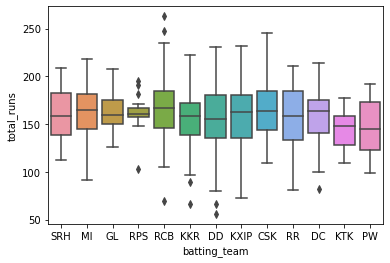

In [17]:
sns.boxplot(x='batting_team',y='total_runs',data=inning1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

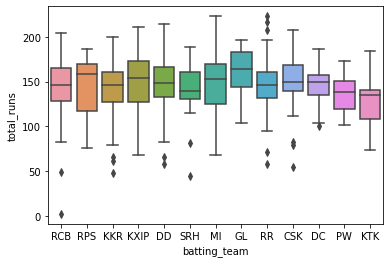

In [18]:
sns.boxplot(x='batting_team',y='total_runs',data=inning2)

## Batting and Bowling Teams having runs above 200

In [19]:
high_score=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_score

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183
...,...,...,...,...,...
1279,634,2,KKR,SRH,140
1280,635,1,GL,SRH,162
1281,635,2,SRH,GL,163
1282,636,1,SRH,RCB,208


In [20]:
score_200=high_score[high_score['total_runs']>=200]
score_200

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KXIP,207
72,36,1,SRH,KKR,209
...,...,...,...,...,...
1250,620,1,RCB,GL,248
1256,623,1,MI,DD,206
1262,626,1,RCB,KXIP,211
1282,636,1,SRH,RCB,208


G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='batting_team', ylabel='count'>

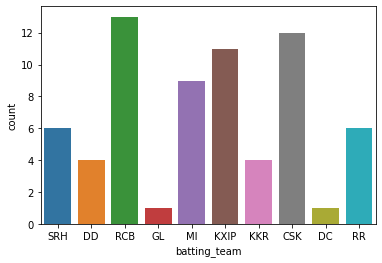

In [21]:
sns.countplot(score_200['batting_team'])

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bowling_team', ylabel='count'>

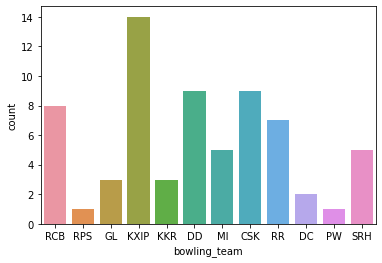

In [22]:
sns.countplot(score_200['bowling_team'])

## Top 10 Batsman by number of balls

In [23]:
balls=df.groupby('batsman')['ball'].sum().reset_index()
balls

,batsman,ball
0,A Ashish Reddy,720
1,A Chandila,23
2,A Chopra,273
3,A Choudhary,71
4,A Flintoff,203
...,...,...
456,YV Takawale,695
457,Yashpal Singh,250
458,Younis Khan,25
459,Yuvraj Singh,7599


<AxesSubplot:xlabel='batsman'>

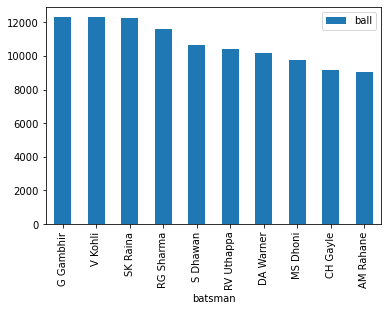

In [24]:
balls.sort_values(by='ball',ascending=False)[:10].plot(kind='bar',x='batsman')

## Top 10 Batsman by number of runs

In [25]:
run=df.groupby('batsman')['batsman_runs'].sum().reset_index()
run

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62
...,...,...
456,YV Takawale,192
457,Yashpal Singh,47
458,Younis Khan,3
459,Yuvraj Singh,2591


<AxesSubplot:xlabel='batsman'>

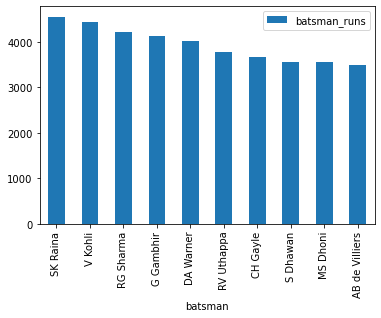

In [26]:
run.sort_values(by='batsman_runs',ascending=False)[:10].plot(kind='bar',x='batsman')

##  Highest Wickest Taker

In [27]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [28]:
dismissal_kind=['caught', 'bowled','lbw', 'caught and bowled',
       'stumped', 'hit wicket', ]

In [29]:
hwt=df[df['dismissal_kind'].isin(dismissal_kind)]
hwt

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150402,636,2,RCB,SRH,11,3,CH Gayle,V Kohli,BCJ Cutting,0,...,0,0,0,0,0,0,0,CH Gayle,caught,Bipul Sharma
150416,636,2,RCB,SRH,13,5,V Kohli,AB de Villiers,BB Sran,0,...,0,0,0,0,0,0,0,V Kohli,bowled,NaN
150422,636,2,RCB,SRH,14,5,AB de Villiers,KL Rahul,Bipul Sharma,0,...,0,0,0,0,0,0,0,AB de Villiers,caught,MC Henriques
150432,636,2,RCB,SRH,16,3,KL Rahul,SR Watson,BCJ Cutting,0,...,0,0,0,0,0,0,0,KL Rahul,bowled,NaN


<AxesSubplot:ylabel='bowler'>

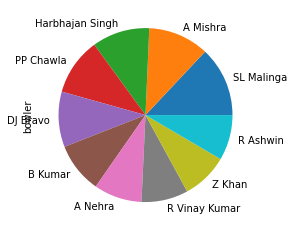

In [30]:
hwt['bowler'].value_counts()[:10].plot(kind='pie')